# Ridge regression on house sales data

### Fire up Graphlab Create

In [1]:
import graphlab

### Polynomial regression function

In [60]:
#Create an SFrame consisting of the powers of an SArray up to a specific degree:
def polynomial_sframe(feature, degree):
    
    poly_sframe = graphlab.SFrame() # creates an empty sframe
    
    poly_sframe['power_1'] = feature # set the feature sarray as the first column of the sframe
  
    if degree > 1: # first check if degree > 1
        for power in range(2, degree + 1): 
            
            name = 'power_' + str(power) # name the column according to the degree
            
            poly_sframe[name] = feature.apply(lambda x : x**power ) #assign poly_sframe[name] to the appropriate power of feature

    return poly_sframe    

Let's use matplotlib to visualize what a polynomial regression looks like on the house data.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sales = graphlab.SFrame('kc_house_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to agrawal.pr@husky.neu.edu and will expire on March 12, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\agraw\AppData\Local\Temp\graphlab_server_1494718103.log.0


For plotting purposes (connecting the dots), we need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [61]:
sales = sales.sort(['sqft_living','price'])

Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of `1e-5`:

In [62]:
l2_small_penalty = 1e-5

Step 1: Create 15 degree polynomial sframe of sqft_living feature of the dataset, copy the corresponding price column, copy all feaures of the polynomial sframe to an sarray

In [63]:
poly_data = polynomial_sframe(sales['sqft_living'], 15)
poly_features = poly_data.column_names()
poly_data['price'] = sales['price']

Step 2: Build model for the dataset

In [79]:
model = graphlab.linear_regression.create(poly_data, target='price', features=['power_1'], validation_set=None, 
                                             l2_penalty=l2_small_penalty, verbose=False)

In [80]:
model.get('coefficients').print_rows(num_rows=16)

+-------------+-------+---------------+---------------+
|     name    | index |     value     |     stderr    |
+-------------+-------+---------------+---------------+
| (intercept) |  None | -43580.738672 | 4402.68969741 |
|   power_1   |  None | 280.623565838 | 1.93639855512 |
+-------------+-------+---------------+---------------+
[2 rows x 4 columns]



### Observe overfitting

First, split the data into split the sales data into four subsets of roughly equal size and call them `set_1`, `set_2`, `set_3`, and `set_4`. Use `.random_split` function and make sure you set `seed=0`. 

In [68]:
(semi_split1, semi_split2) = sales.random_split(.5,seed=0)
(set_1, set_2) = semi_split1.random_split(0.5, seed=0)
(set_3, set_4) = semi_split2.random_split(0.5, seed=0)

Step 1: Polynomial sframes for all the 4 sets

In [16]:
set_1_poly_data = polynomial_sframe(set_1['sqft_living'], 15)
set_2_poly_data = polynomial_sframe(set_2['sqft_living'], 15)
set_3_poly_data = polynomial_sframe(set_3['sqft_living'], 15)
set_4_poly_data = polynomial_sframe(set_4['sqft_living'], 15)

Step 2: Adding the corresponding price column to all the 4 sets

In [69]:
set_1_poly_data['price'] = set_1['price']
set_2_poly_data['price'] = set_2['price']
set_3_poly_data['price'] = set_3['price']
set_4_poly_data['price'] = set_4['price']

Step 3: Building models for all the 4 sets

In [70]:
model1 = graphlab.linear_regression.create(set_1_poly_data, target='price', features=poly_features, validation_set=None, 
                                           l2_penalty=l2_small_penalty, verbose=None)
model2 = graphlab.linear_regression.create(set_2_poly_data, target='price', features=poly_features, validation_set=None, 
                                           l2_penalty=l2_small_penalty, verbose=None)
model3 = graphlab.linear_regression.create(set_3_poly_data, target='price', features=poly_features, validation_set=None, 
                                           l2_penalty=l2_small_penalty, verbose=None)
model4 = graphlab.linear_regression.create(set_4_poly_data, target='price', features=poly_features, validation_set=None, 
                                           l2_penalty=l2_small_penalty, verbose=None)

Step 4: Plotting the models of all the four sets

In [71]:
#Model 1
plt.plot(set_1_poly_data['power_1'], set_1_poly_data['price'], '.',
        set_1_poly_data['power_1'], model1.predict(set_1_poly_data), '-')

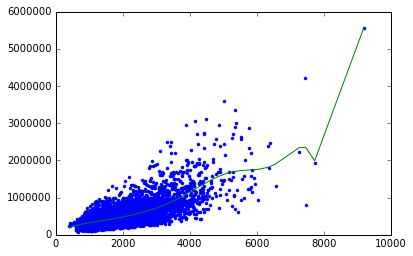

In [72]:
#Model 2
plt.plot(set_2_poly_data['power_1'], set_2_poly_data['price'], '.',
        set_2_poly_data['power_1'], model2.predict(set_2_poly_data), '-')

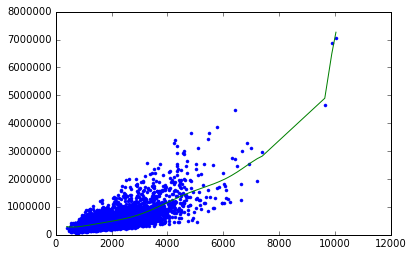

In [73]:
#Model 3
plt.plot(set_3_poly_data['power_1'], set_3_poly_data['price'], '.',
        set_3_poly_data['power_1'], model3.predict(set_3_poly_data), '-')

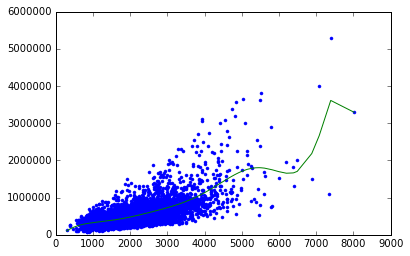

In [74]:
#Model 4
plt.plot(set_4_poly_data['power_1'], set_4_poly_data['price'], '.',
        set_4_poly_data['power_1'], model4.predict(set_4_poly_data), '-')

The model curves differ greatly in this models with lower l2 penalty

Step 5: Getting the coefficients of each model of the 4 sets

In [75]:
model1.get('coefficients')

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 16

Data:
+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   9306.46397814    |   835063.417729   |
|   power_1   |  None |    585.86581347    |   3484.52405144   |
|   power_2   |  None |  -0.397305884724   |   5.85325120701   |
|   power_3   |  None | 0.000141470894825  |  0.00510563501632 |
|   power_4   |  None | -1.52945974394e-08 | 2.39686540035e-06 |
|   power_5   |  None | -3.79756526062e-13 | 3.43613043735e-10 |
|   power_6   |  None |  5.9748184732e-17  |        nan        |
|   power_7   |  None | 1.06888505979e-20  |        nan        |
|   power_8   |  None | 1.59344052349e-25  |        nan        |
|   power_9   |  None | -6.9283495515e-29  | 3.72130313789e-25 |
+-------------+-------+--------------------+-------------------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [76]:
model2.get('coefficients')

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 16

Data:
+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   -25115.9059869   |   1675771.52039   |
|   power_1   |  None |   783.493802508    |   9984.85507514   |
|   power_2   |  None |  -0.767759300173   |   25.2592296765   |
|   power_3   |  None | 0.000438766361934  |  0.0358329790553  |
|   power_4   |  None | -1.15169161152e-07 | 3.17792630727e-05 |
|   power_5   |  None | 6.84281148707e-12  | 1.85840552557e-08 |
|   power_6   |  None |  2.5119522464e-15  | 7.34916239474e-12 |
|   power_7   |  None | -2.06440624344e-19 | 1.97638603378e-15 |
|   power_8   |  None | -4.59673058828e-23 | 3.56090427394e-19 |
|   power_9   |  None | -2.71277342492e-29 | 3.98355514126e-23 |
+-------------+-------+--------------------+-------------------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [77]:
model3.get('coefficients')

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 16

Data:
+-------------+-------+--------------------+--------+
|     name    | index |       value        | stderr |
+-------------+-------+--------------------+--------+
| (intercept) |  None |   462426.565731    |  nan   |
|   power_1   |  None |   -759.251842854   |  nan   |
|   power_2   |  None |    1.0286700473    |  nan   |
|   power_3   |  None | -0.000528264527386 |  nan   |
|   power_4   |  None | 1.15422908385e-07  |  nan   |
|   power_5   |  None | -2.26095948062e-12 |  nan   |
|   power_6   |  None | -2.08214287571e-15 |  nan   |
|   power_7   |  None | 4.08770475709e-20  |  nan   |
|   power_8   |  None |  2.570791329e-23   |  nan   |
|   power_9   |  None | 1.24311265196e-27  |  nan   |
+-------------+-------+--------------------+--------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [78]:
model4.get('coefficients')

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 16

Data:
+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   -170240.034791   |   1417346.17184   |
|   power_1   |  None |   1247.59035088    |   8978.28059127   |
|   power_2   |  None |   -1.2246091264    |   23.6158213076   |
|   power_3   |  None | 0.000555254626787  |  0.0340561499439  |
|   power_4   |  None | -6.38262361929e-08 | 2.98955350115e-05 |
|   power_5   |  None | -2.20215996475e-11 | 1.65791592065e-08 |
|   power_6   |  None | 4.81834697594e-15  | 5.63745618764e-12 |
|   power_7   |  None |  4.2146163248e-19  | 8.27510918329e-16 |
|   power_8   |  None | -7.99880749051e-23 |        nan        |
|   power_9   |  None | -1.32365907706e-26 |        nan        |
+-------------+-------+--------------------+-------------------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

### So it can be seen that the value of weights changes with the variation in data as first we used the full dataset to make our model and then we used 4 different subsets of our dataset to make 4 different models
### Ridge regression now comes to the rescue

Generally, whenever we see weights change so much in response to change in data, we believe the variance of our estimate to be large. Ridge regression aims to address this issue by penalizing "large" weights.

### New L2 penalty (larger)

In [81]:
l2_penalty = 1e5

In [82]:
new_model1 = graphlab.linear_regression.create(set_1_poly_data, target='price', features=poly_features, validation_set=None, 
                                           l2_penalty=l2_penalty, verbose=None)
new_model2 = graphlab.linear_regression.create(set_2_poly_data, target='price', features=poly_features, validation_set=None, 
                                           l2_penalty=l2_penalty, verbose=None)
new_model3 = graphlab.linear_regression.create(set_3_poly_data, target='price', features=poly_features, validation_set=None, 
                                           l2_penalty=l2_penalty, verbose=None)
new_model4 = graphlab.linear_regression.create(set_4_poly_data, target='price', features=poly_features, validation_set=None, 
                                           l2_penalty=l2_penalty, verbose=None)

Print coefficients of new models

In [83]:
new_model1.get('coefficients')

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 16

Data:
+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   530317.024516   |    1256668.1989   |
|   power_1   |  None |   2.58738875673   |   5243.78205387   |
|   power_2   |  None |  0.00127414400592 |   8.80842639712   |
|   power_3   |  None | 1.74934226932e-07 |  0.00768335556793 |
|   power_4   |  None | 1.06022119097e-11 | 3.60698895641e-06 |
|   power_5   |  None | 5.42247604482e-16 | 5.17095558996e-10 |
|   power_6   |  None | 2.89563828343e-20 |        nan        |
|   power_7   |  None | 1.65000666351e-24 |        nan        |
|   power_8   |  None | 9.86081528409e-29 |        nan        |
|   power_9   |  None | 6.06589348254e-33 | 5.60010558786e-25 |
+-------------+-------+-------------------+-------------------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [84]:
new_model2.get('coefficients')

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 16

Data:
+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   519216.897383   |   2309581.08725   |
|   power_1   |  None |   2.04470474182   |   13761.3225669   |
|   power_2   |  None |  0.0011314362684  |    34.812764407   |
|   power_3   |  None | 2.93074277549e-07 |  0.0493857126218  |
|   power_4   |  None | 4.43540598453e-11 | 4.37988019645e-05 |
|   power_5   |  None | 4.80849112204e-15 | 2.56129084549e-08 |
|   power_6   |  None | 4.53091707826e-19 |  1.0128759361e-11 |
|   power_7   |  None | 4.16042910575e-23 | 2.72389388957e-15 |
|   power_8   |  None | 3.90094635128e-27 | 4.90770792111e-19 |
|   power_9   |  None |  3.7773187602e-31 | 5.49021361344e-23 |
+-------------+-------+-------------------+-------------------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [85]:
new_model3.get('coefficients')

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 16

Data:
+-------------+-------+-------------------+--------+
|     name    | index |       value       | stderr |
+-------------+-------+-------------------+--------+
| (intercept) |  None |   522911.518048   |  nan   |
|   power_1   |  None |   2.26890421877   |  nan   |
|   power_2   |  None |  0.00125905041842 |  nan   |
|   power_3   |  None | 2.77552918155e-07 |  nan   |
|   power_4   |  None |  3.2093309779e-11 |  nan   |
|   power_5   |  None | 2.87573572364e-15 |  nan   |
|   power_6   |  None | 2.50076112671e-19 |  nan   |
|   power_7   |  None | 2.24685265906e-23 |  nan   |
|   power_8   |  None | 2.09349983135e-27 |  nan   |
|   power_9   |  None | 2.00435383296e-31 |  nan   |
+-------------+-------+-------------------+--------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

In [86]:
new_model4.get('coefficients')

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 16

Data:
+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   513667.087087   |   1874267.58319   |
|   power_1   |  None |   1.91040938244   |   11872.6819173   |
|   power_2   |  None |  0.00110058029175 |   31.2290456676   |
|   power_3   |  None | 3.12753987879e-07 |  0.0450351079477  |
|   power_4   |  None | 5.50067886825e-11 | 3.95332017452e-05 |
|   power_5   |  None | 7.20467557825e-15 | 2.19239175825e-08 |
|   power_6   |  None | 8.24977249384e-19 | 7.45484878293e-12 |
|   power_7   |  None | 9.06503223498e-23 | 1.09428234243e-15 |
|   power_8   |  None | 9.95683160453e-27 |        nan        |
|   power_9   |  None | 1.10838127982e-30 |        nan        |
+-------------+-------+-------------------+-------------------+
[16 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

Plotting the models of all the 4 sets

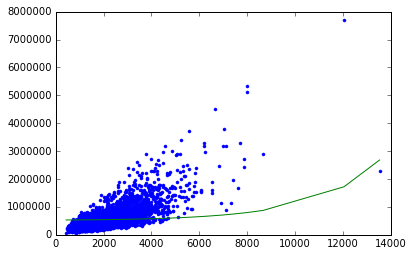

In [88]:
#New Model 1
plt.plot(set_1_poly_data['power_1'], set_1_poly_data['price'], '.', 
         set_1_poly_data['power_1'], new_model1.predict(set_1_poly_data), '-')

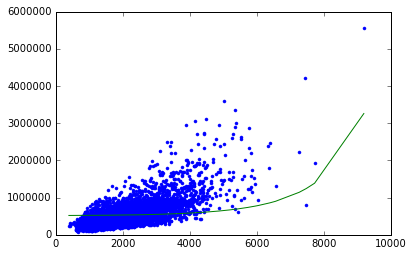

In [89]:
#New Model 2
plt.plot(set_2_poly_data['power_1'], set_2_poly_data['price'], '.', 
         set_2_poly_data['power_1'], new_model2.predict(set_2_poly_data), '-')

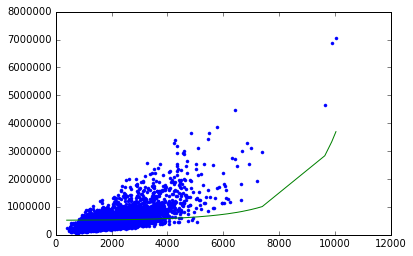

In [90]:
#New Model 3
plt.plot(set_3_poly_data['power_1'], set_3_poly_data['price'], '.', 
         set_3_poly_data['power_1'], new_model3.predict(set_3_poly_data), '-')

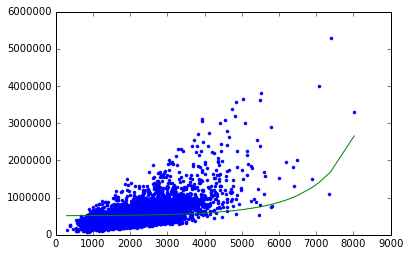

In [91]:
#New Model 4
plt.plot(set_4_poly_data['power_1'], set_4_poly_data['price'], '.', 
         set_4_poly_data['power_1'], new_model4.predict(set_4_poly_data), '-')

These curves should vary a lot less, now that you applied a high degree of regularization.

### In these new models with higher l2 penalty we can see the weights differ less and the corresponding model predictions also have less variation in the curves

### Selecting an L2 penalty via K folds cross-validation

Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that  all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments.

In [93]:
(train_valid, test) = sales.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)

Once the data is shuffled, we divide it into equal segments. Each segment should receive `n/k` elements, where `n` is the number of observations in the training set and `k` is the number of segments. Since the segment 0 starts at index 0 and contains `n/k` elements, it ends at index `(n/k)-1`. The segment 1 starts where the segment 0 left off, at index `(n/k)`. With `n/k` elements, the segment 1 ends at index `(n*2/k)-1`. Continuing in this fashion, we deduce that the segment `i` starts at index `(n*i/k)` and ends at `(n*(i+1)/k)-1`.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure you are getting the splits right.

In [97]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation
print "Dataset length: " +str(n)
print "No. of segments: " +str(k)
print "Segments:"
for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

Dataset length: 19396
No. of segments: 10
Segments:
0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [98]:
train_valid_shuffled[0:10] # rows 0 to 9

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 10

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 2780400035 | 2014-05-05 00:00:00+00:00 | 665000.0 |   4.0    |    2.5    |
| 1703050500 | 2015-03-21 00:00:00+00:00 | 645000.0 |   3.0    |    2.5    |
| 5700002325 | 2014-06-05 00:00:00+00:00 | 640000.0 |   3.0    |    1.75   |
| 0475000510 | 2014-11-18 00:00:00+00:00 | 594000.0 |   3.0    |    1.0    |
| 0844001052 | 2015-01-28 00:00:00+00:00 | 365000.0 |   4.0    |    2.5    |
| 2781280290 | 2015-04-27 00:00:00+00:00 | 305000.0 |   3.0    |    2.5    |
| 2214800630 | 2014-11-05 00:00:00+00:00 | 239950.0 |   3.0    |    2.25   |
| 2114700540 | 2014-10-21 00:00:00+00:00 | 366000.0 |   3.0    |    2.5    |
| 2596400050 | 2014-07-30 00:00:00+00:00 | 375000.0 |   3.0    |    1.0    |
| 4140900050 | 2015-01-26 00:00:00+00:00 | 440000.0 |   4.0    |    1.75   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+------------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade | sqft_above |
+-------------+----------+--------+------------+------+-----------+-------+------------+
|    2800.0   |   5900   |   1    |     0      |  0   |     3     |   8   |    1660    |
|    2490.0   |   5978   |   2    |     0      |  0   |     3     |   9   |    2490    |
|    2340.0   |   4206   |   1    |     0      |  0   |     5     |   7   |    1170    |
|    1320.0   |   5000   |   1    |     0      |  0   |     4     |   7   |    1090    |
|    1904.0   |   8200   |   2    |     0      |  0   |     5     |   7   |    1904    |
|    1610.0   |   3516   |   2    |     0      |  0   |     3     |   8   |    1610    |
|    1560.0   |   8280   |   2    |     0      |  0   |     4     |   7   |    1560    |
|    1320.0   |   4320   |   1    |     0      |  0   |     3     |   6   |    660     |
|    1960.0   |   7955   |   1    |     0      |  0   |     4     |   7   |    1260    |
|    2180.0   |  10200   |   1    |     0      |  2   |     3     |   8   |    2000    |
+-------------+----------+--------+------------+------+-----------+-------+------------+
+---------------+----------+--------------+---------+-------------+
| sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+---------------+----------+--------------+---------+-------------+
|      1140     |   1963   |      0       |  98115  | 47.68093246 |
|       0       |   2003   |      0       |  98074  | 47.62984888 |
|      1170     |   1917   |      0       |  98144  | 47.57587004 |
|      230      |   1920   |      0       |  98107  | 47.66737217 |
|       0       |   1999   |      0       |  98010  | 47.31068733 |
|       0       |   2006   |      0       |  98055  | 47.44911017 |
|       0       |   1979   |      0       |  98001  | 47.33933392 |
|      660      |   1918   |      0       |  98106  | 47.53271982 |
|      700      |   1963   |      0       |  98177  | 47.76407345 |
|      180      |   1966   |      0       |  98028  | 47.76382378 |
+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.28583258 |     2580.0    | ... |
| -122.02177564 |     2710.0    | ... |
|   -122.28796  |     1360.0    | ... |
| -122.36472902 |     1700.0    | ... |
|  -122.0012452 |     1560.0    | ... |
|  -122.1878086 |     1610.0    | ... |
| -122.25864364 |     1920.0  

Now let us extract individual segments with array slicing. Consider the scenario where we group the houses in the `train_valid_shuffled` dataframe into k=10 segments of roughly equal size, with starting and ending indices computed as above.
Extract the fourth segment (segment 3) and assign it to a variable called `validation4`.

In [99]:
validation4 = train_valid_shuffled[5818:7758]

Extract the remainder of the data after *excluding* fourth segment (segment 3) and assign the subset to `train4`.

In [103]:
train4 = train_valid_shuffled[0:5818].append(train_valid_shuffled[7758:])

Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) `k`, (ii) `l2_penalty`, (iii) dataframe, (iv) name of output column (e.g. `price`) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.

* For each i in [0, 1, ..., k-1]:
  * Compute starting and ending indices of segment i and call 'start' and 'end'
  * Form validation set by taking a slice (start:end+1) from the data.
  * Form training set by appending slice (end+1:n) to the end of slice (0:start).
  * Train a linear model using training set just formed, with a given l2_penalty
  * Compute validation error using validation set just formed

### K-folds cross validation algorithm

In [174]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    n = len(data)
    validation_error_sum = 0
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation_set = data[start:end+1]
        train_set = data[0:start].append(data[end+1:n])
        linear_model = graphlab.linear_regression.create(train_set, target=output_name, features=features_list, 
                                                         validation_set=None, l2_penalty = l2_penalty, verbose=False)
        model_predictions = linear_model.predict(validation_set)
        residuals = model_predictions - validation_set[output_name]
        residuals_squared = residuals*residuals
        residuals_sums_squared = residuals_squared.sum()
        validation_error_sum = validation_error_sum + residuals_sums_squared
    avg_validation_error = validation_error_sum/k
    return (avg_validation_error)

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
* We will again be aiming to fit a 15th-order polynomial model using the `sqft_living` input
* For `l2_penalty` in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: `np.logspace(1, 7, num=13)`.)
    * Run 10-fold cross-validation with `l2_penalty`
* Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use `train_valid_shuffled` when generating polynomial features!

In [175]:
import numpy as ng

#New l2 penalties
l2_penalties = ng.logspace(1, 7, num=13)
print l2_penalties

[  1.00000000e+01   3.16227766e+01   1.00000000e+02   3.16227766e+02
   1.00000000e+03   3.16227766e+03   1.00000000e+04   3.16227766e+04
   1.00000000e+05   3.16227766e+05   1.00000000e+06   3.16227766e+06
   1.00000000e+07]


In [176]:
#New polynomial sframe from the shuffled data, getting its features and appending price column
new_poly_sframe = polynomial_sframe(train_valid_shuffled['sqft_living'], 15)
new_features = new_poly_sframe.column_names()
new_poly_sframe['price'] = train_valid_shuffled['price']

In [177]:
#Data exploration
new_poly_sframe[0:1]

Columns:
	power_1	float
	power_2	float
	power_3	float
	power_4	float
	power_5	float
	power_6	float
	power_7	float
	power_8	float
	power_9	float
	power_10	float
	power_11	float
	power_12	float
	power_13	float
	power_14	float
	power_15	float
	price	float

Rows: 1

Data:
+---------+-----------+---------------+-------------+---------------+
| power_1 |  power_2  |    power_3    |   power_4   |    power_5    |
+---------+-----------+---------------+-------------+---------------+
|  2800.0 | 7840000.0 | 21952000000.0 | 6.14656e+13 | 1.7210368e+17 |
+---------+-----------+---------------+-------------+---------------+
+----------------+------------------+-------------------+-------------------+
|    power_6     |     power_7      |      power_8      |      power_9      |
+----------------+------------------+-------------------+-------------------+
| 4.81890304e+20 | 1.3492928512e+24 | 3.77801998336e+27 | 1.05784559534e+31 |
+----------------+------------------+-------------------+-------------------+
+-------------------+-------------------+-------------------+------------------+
|      power_10     |      power_11     |      power_12     |     power_13     |
+-------------------+-------------------+-------------------+------------------+
| 2.96196766695e+34 | 8.29350946747e+37 | 2.32218265089e+41 | 6.5021114225e+44 |
+-------------------+-------------------+-------------------+------------------+
+------------------+-------------------+----------+
|     power_14     |      power_15     |  price   |
+------------------+-------------------+----------+
| 1.8205911983e+48 | 5.09765535524e+51 | 665000.0 |
+------------------+-------------------+----------+
[1 rows x 16 columns]

In [178]:
k = 10
l2_with_error = {}
for i in xrange(13):
    error = k_fold_cross_validation(k, l2_penalties[i], new_poly_sframe, 'price', new_features)
    l2_with_error[l2_penalties[i]] = error

***The best value for the L2 penalty according to 10-fold validation***

In [179]:
best_l2_penalty = min(l2_with_error, key=l2_with_error.get)
print best_l2_penalty

1000.0


In [180]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
x = []
y = []
for key, value in l2_with_error.iteritems():
    x.append(key)
    y.append(value)
plt.plot(x, y)
plt.xscale('log')
plt.xlabel("L2 Penalty")
plt.ylabel("Validation Error")

### Final model on the entire dataset

In [181]:
#Make a polynomial sframe of the training dataset previously defined
training_sframe = polynomial_sframe(train_valid['sqft_living'], 15)
training_features = training_sframe.column_names()
training_sframe['price'] = train_valid['price']

In [182]:
#Build Model
final_model = graphlab.linear_regression.create(training_sframe, target='price', features=training_features, 
                                                validation_set=None, l2_penalty=best_l2_penalty)

Linear regression:

--------------------------------------------------------

Number of examples          : 19396

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.021056     | 2461778.986191     | 248914.007014 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [183]:
#Print coefficients
final_model.get('coefficients').print_rows(num_rows=16)

+-------------+-------+--------------------+-------------------+
|     name    | index |       value        |       stderr      |
+-------------+-------+--------------------+-------------------+
| (intercept) |  None |   253972.377679    |    367462.37212   |
|   power_1   |  None |   57.3754544277    |   1590.43255027   |
|   power_2   |  None |   0.023783252166   |   2.86786168836   |
|   power_3   |  None | 2.64303484986e-06  |  0.00286512676271 |
|   power_4   |  None | 6.53250411225e-11  | 1.79195665478e-06 |
|   power_5   |  None | -1.0280259983e-15  | 7.58805357825e-10 |
|   power_6   |  None | -1.17062658026e-19 | 2.31829777424e-13 |
|   power_7   |  None | -5.32286483343e-24 | 5.33450720966e-17 |
|   power_8   |  None | -2.90413735131e-28 | 9.21610563699e-21 |
|   power_9   |  None | -2.90869143388e-32 | 1.12882669175e-24 |
|   power_10  |  None | -3.44379026738e-36 | 8.67209992411e-29 |
|   power_11  |  None | -3.74459613949e-40 | 2.96615471992e-33 |
|   power_12  |  None | -

In [184]:
#Plot model predictions and actual predictions for power_1
plt.plot(training_sframe['power_1'], training_sframe['price'], '.', 
        training_sframe['power_1'], final_model.predict(training_sframe), '-')

### RSS on the TEST data using the final model learned with best L2 penalty

In [185]:
#Creating sframe for the test dataset
test_sframe = polynomial_sframe(test['sqft_living'], 15)
test_sframe['price'] = test['price']

#Calculating the RSS using final model on the test dataset
final_model_predictions = final_model.predict(test_sframe)
actual_predictions = test_sframe['price']
res = actual_predictions - final_model_predictions
res_squared = res*res
res_errors_sum_squared = res_squared.sum()
print res_errors_sum_squared

1.28780855058e+14
